# Week 5 Assignment
# Henry Pham
# Department of Data Science, Bellevue University
# DSC530-T301
# Professor: Cary Jim
# Assignment Due Date: 2023-04-16

In [1]:
#----Chapter 05----

In [1]:
# Exercise 5-1

#  In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf

In [2]:
# Import scipy library
import scipy.stats

# Convert heights to centimeters
# convert the heights of 5'10" and 6'1" to centimeters using the conversion factor of 2.54 cm/inch.
h1 = (5 * 12 + 10) * 2.54  # 5'10" in cm
h2 = (6 * 12 + 1) * 2.54  # 6'1" in cm

# Compute the CDF of the normal distribution for male heights
mu_m = 178
sigma_m = 7.7

# probability of being shorter than 5'10"
p1 = scipy.stats.norm.cdf(h1, loc=mu_m, scale=sigma_m) 

# probability of being shorter than 6'1"
p2 = scipy.stats.norm.cdf(h2, loc=mu_m, scale=sigma_m)  

# Compute the probability of being between 5'10" and 6'1" by subtracting the probability of 
# being shorter than 5'10" from the probability of being shorter than 6'1". 
# Multiply this probability by 100 to obtain the percentage of males in the desired height range.
p_male = p2 - p1
pct_male = p_male * 100

# Print out
print(f"{pct_male:.2f}% of U.S. males are between 5'10\" and 6'1\" and eligible to join Blue Man Group.")

34.27% of U.S. males are between 5'10" and 6'1" and eligible to join Blue Man Group.


In [4]:
# Exercise 5-2

# To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [6]:
import scipy.stats
import thinkplot
import numpy as np


# Compute the mean human height and fraction shorter than the mean
mean_height = dist.mean()
frac_shorter = dist.cdf(mean_height)

# Compute the number of people taller than 1 km in Pareto world
taller_than_1km = (1 - dist.cdf(1000)) * 7e9

# Compute the expected height of the tallest person in Pareto world
tallest_height = dist.ppf(1 - 1/7e9)

# Print out
print(f"Mean human height in Pareto world: {mean_height:.2f} m")
print(f"Fraction of population shorter than mean: {frac_shorter:.2%}")
print(f"Number of people taller than 1 km: {taller_than_1km:.0f}")
print(f"Expected height of tallest person: {tallest_height:.2f} m")

Mean human height in Pareto world: 2.43 m
Fraction of population shorter than mean: 77.87%
Number of people taller than 1 km: 55603
Expected height of tallest person: 618349.61 m


In [11]:
#----Chapter 06----

In [12]:
# Exercise 6-1

# The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is. The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under  5000.”𝑇ℎ𝑒ℎ𝑖𝑔ℎ𝑒𝑠𝑡𝑟𝑎𝑛𝑔𝑒𝑖𝑛𝑐𝑙𝑢𝑑𝑒𝑠𝑟𝑒𝑠𝑝𝑜𝑛𝑑𝑒𝑛𝑡𝑠𝑤ℎ𝑜𝑚𝑎𝑑𝑒“
 250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is  106
 , or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [7]:
# import library os, basename and exists
from os.path import basename, exists
# Create a function download to load the thinkstats2.py and thinkploy.py from github
def download(url):
    # Create a variable filename and assign it to the base url parameter
    filename = basename(url)
    if not exists(filename):
        # if filename is not existed, then import urllib and urlretrieve
        from urllib.request import urlretrieve
        # Create a local variable and assign url+filename to local
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Call the download function to download hinc.py, and hinc06.csv to DSC530 folder
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/hinc06.csv")


In [13]:
# Create a function of InterpolateSample with 2 arguments df and log_upper.
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [14]:
# Import hinc and read data
import hinc
income_df = hinc.ReadData()

In [15]:
# Call a function InterpolateSample and assign it to log_sample
log_sample = InterpolateSample(income_df, log_upper=6.0)

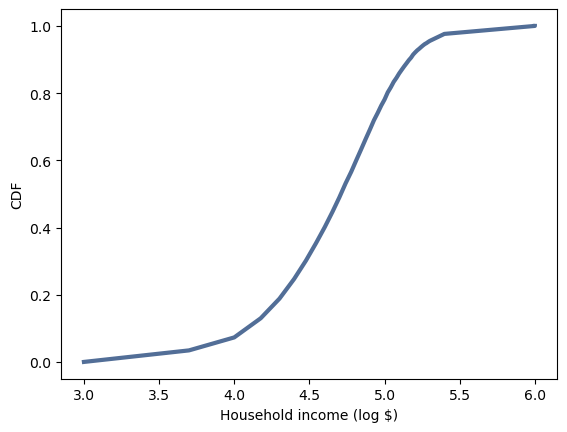

In [16]:
# Import thinkstats2
import thinkstats2

# The thinkstats2.Cdf() function takes in a sample of values and returns a Cdf object that represents 
# the cumulative distribution function of the values. In this case, passing in log_sample
# Then using thinkplot.Cdf() to plot the CDF
# using thinkplot.Config() to set the labels for the x and y axes.
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [17]:
# Generate a sample of incomes
sample = np.power(10, log_sample)

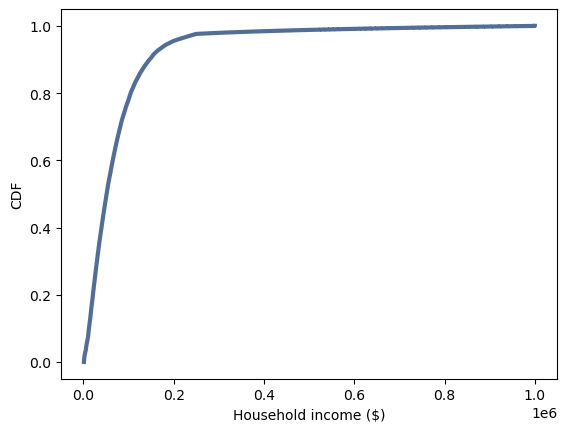

In [18]:
# The thinkstats2.Cdf() function takes in a sample of values and returns a Cdf object that represents 
# the cumulative distribution function of the values. In this case, passing in sample
# Then using thinkplot.Cdf() to plot the CDF
# using thinkplot.Config() to set the labels for the x and y axes.
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [19]:
import hinc2
import hinc
import numpy as np
import thinkstats2

# Compute various statistics
mean = np.mean(sample)
median = np.median(sample)
skewness = thinkstats2.Skewness(sample)
pearson_skewness = 3 * (mean - median) / np.std(sample)
cdf = thinkstats2.Cdf(sample)

# Print out
print('Mean:', mean)
print('Median:', median)
print('Skewness:', skewness)
print('Pearson skewness:', pearson_skewness)
print('Fraction below the mean:', cdf[mean])

Mean: 74278.7075311872
Median: 51226.93306562372
Skewness: 4.949920244429583
Pearson skewness: 0.7361105192428792
Fraction below the mean: 0.660005879566872


In [ ]:
# These results indicate that the distribution of household incomes is highly skewed to the right. 
# The mean is substantially higher than the median, which indicates that the distribution is skewed. 
# The skewness and Pearson’s skewness are both positive, which confirms that the distribution is skewed to the right. 
# Additionally, the fraction of households reporting a taxable income below the mean is about 66%, 
# which indicates that the majority of households earn below the average income.